<a href="https://colab.research.google.com/github/dtoralg/intro_unsupervised/blob/main/notebooks/E2_Clustering_Jeraquico_con_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Clustering Jerárquico: Discriminación de outliers con IRIS



## Introducción e información previa

Segundo ejercicio práctico, donde aplicaremos técnicas de aprendizaje no supervisado para agrupar diferentes tipos de flores del famoso dataset IRIS. Este ejercicio tiene como objetivo identificar grupos naturales en los datos, facilitando la comprensión de las relaciones y similitudes entre las muestras de flores.

### Objetivos del Ejercicio

- **Comprender los conceptos básicos del clustering jerárquico** y cómo se aplica en el contexto de análisis de datos.
- **Preprocesar los datos** del dataset IRIS para prepararlos adecuadamente para el análisis.
- **Implementar clustering jerárquico** utilizando métodos como el enlace completo, el enlace simple y el enlace promedio.
- **Visualizar los dendrogramas** para interpretar los resultados del clustering jerárquico.
- **Evaluar la calidad de los clusters** y discutir los insights obtenidos.

### Descripción del Dataset IRIS

El dataset IRIS es uno de los conjuntos de datos más conocidos y utilizados en el campo del Machine Learning y la estadística. Contiene 150 muestras de flores, cada una descrita por cuatro características métricas:

- **Sepal Length (cm):** Longitud del sépalo
- **Sepal Width (cm):** Ancho del sépalo
- **Petal Length (cm):** Longitud del pétalo
- **Petal Width (cm):** Ancho del pétalo

Además, cada muestra está etiquetada con una de las tres especies de iris:

- **Iris-setosa**
- **Iris-versicolor**
- **Iris-virginica**

En este ejercicio, utilizaremos las características métricas para realizar clustering jerárquico y analizaremos cómo se agrupan las muestras sin usar las etiquetas de especie durante el proceso de agrupamiento.

### Estructura del Notebook

1. **Importación de Librerías y Carga de Datos:** Preparar el entorno de trabajo e importar el dataset IRIS.
2. **Exploración de Datos:** Analizar las características principales del dataset IRIS.
3. **Preprocesamiento de Datos:** Normalizar los datos para asegurar que todas las características contribuyan equitativamente al análisis.
4. **Aplicación de Clustering Jerárquico:** Implementar varios métodos de enlace y construir dendrogramas.
5. **Visualización de Dendrogramas:** Graficar y analizar los dendrogramas resultantes para interpretar los clusters formados.
6. **Evaluación de Resultados:** Utilizar métricas de evaluación para analizar la calidad de los clusters.
7. **Discusión y Conclusiones:** Extraer insights y conclusiones a partir de los resultados obtenidos.

### Requisitos

Para seguir este notebook, asegúrate de tener instaladas las siguientes librerías de Python:

- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scipy`
- `scikit-learn`

Puedes instalarlas utilizando el siguiente comando:

```bash
pip install numpy pandas matplotlib seaborn scipy scikit-learn


## LOF (Local Outlier Factor)

Este algoritmo utiliza la densidad local de puntos en un conjunto de datos para identificar anomalías. La idea básica es que, en la mayoría de los conjuntos de datos, la densidad de puntos es relativamente uniforme, y sólo unos pocos puntos tienen densidades significativamente menores o mayores que el resto. El algoritmo LOF utiliza esta propiedad para identificar los puntos que tienen una densidad significativamente menor que sus vecinos, que probablemente sean anomalías.

Para utilizar el algoritmo LOF, primero tenemos que elegir una métrica para medir la densidad de los puntos. La opción más común es la distancia k-vecino más próximo (k-NN), que mide la distancia de cada punto a sus k-vecinos más próximos. El algoritmo LOF calcula entonces la densidad local de cada punto utilizando esta métrica, e identifica como anomalías los puntos que tienen una densidad significativamente menor que sus vecinos.

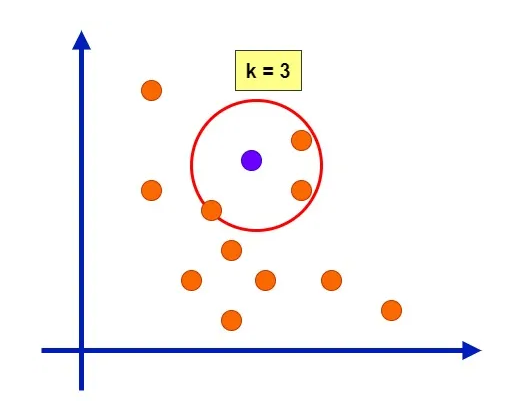


### Importación de los módulos necesarios

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

Cargamos el dataset IRIS directamente desde sklearn ya que es uno de los datasets que vienen incluidos en esta libería.

Como LOF es un modelo lineal, elegimos dos variables: *'Sepal length (cm)'* y *'Sepal width (cm)'*

Otros datasets de [Sklearn disponibles para análisis de ML](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [116]:
df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]

In [117]:
# Definimos el modelo para un ejemplo de n_neighbors = 10
lof = LocalOutlierFactor(n_neighbors= 10)

# Ajustamos el modelo a nuestros datos
lof.fit(X)

# Calculamos el Outlier score de cada punto
scores = lof.negative_outlier_factor_

In [118]:
# Añadimos los valores de outlier_score a un df junto con los valores originales y los ordenamos para ver el mayor outlier_score
scores_df = pd.concat([X, pd.DataFrame({'outlier_score':scores})], axis = 1)
scores_df = scores_df.sort_values(by = ['outlier_score'])
scores_df.head(10)

,sepal length (cm),sepal width (cm),outlier_score
109,7.2,3.6,-2.157850
117,7.7,3.8,-1.953707
131,7.9,3.8,-1.886850
15,5.7,4.4,-1.804662
118,7.7,2.6,-1.726071
122,7.7,2.8,-1.654833
68,6.2,2.2,-1.596810
62,6.0,2.2,-1.595119
119,6.0,2.2,-1.595119
108,6.7,2.5,-1.570276


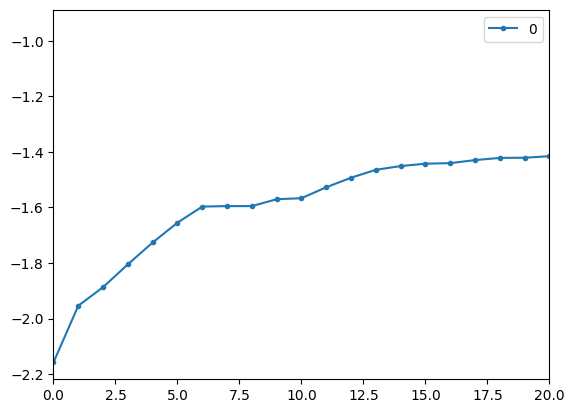

In [119]:
# Para identificar el mejor valor de k para localizar el máximo número de outliers podemos aplicar el método del codo
scores_sort = pd.DataFrame(np.sort(scores_df['outlier_score']))
scores_sort.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

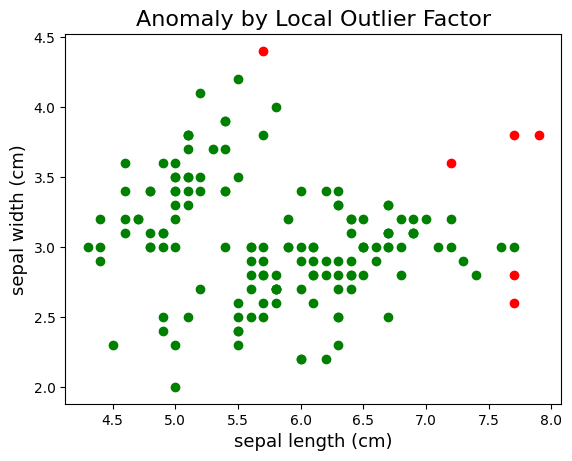

In [122]:
# Usando el método del codo identificamos como outliers aquellos valores con un outlier_score menor que -1.65 (6º data point)
outliers = scores_df[scores_df['outlier_score'] <= -1.6548326210562692]

# Ploteamos para verlo de manera gráfica
colors=['green','red']

for i in range(len(X)):
    if i not in outliers['outlier_score']:
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # No anómalo
    else:
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # Anómalo
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomaly by Local Outlier Factor',fontsize=16)
plt.show()

## Isolation Forest


Otro algoritmo popular para la detección de anomalías es el algoritmo Isolation Forest.

Este algoritmo utiliza árboles de decisión para identificar anomalías, aislando los puntos que son difíciles de alcanzar en el árbol de decisión.

La idea básica es que, en la mayoría de los conjuntos de datos, la mayoría de los puntos pueden alcanzarse en el árbol de decisión con sólo unas pocas divisiones.

En cambio, las anomalías suelen estar aisladas del resto de los datos, por lo que es necesario realizar muchas divisiones para llegar a ellas en el árbol de decisión.

El algoritmo Isolation Forest utiliza esta propiedad para identificar anomalías aislando puntos difíciles de alcanzar en el árbol de decisión.


In [18]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

In [19]:
df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]

In [20]:
# Definimos el modelo y elegimos el contamination level
model = IsolationForest(contamination=0.05)

# Ajustamos el modelo a los datos
model.fit(X)

# Calcuamos el outlier score de cada punto
scores = model.decision_function(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


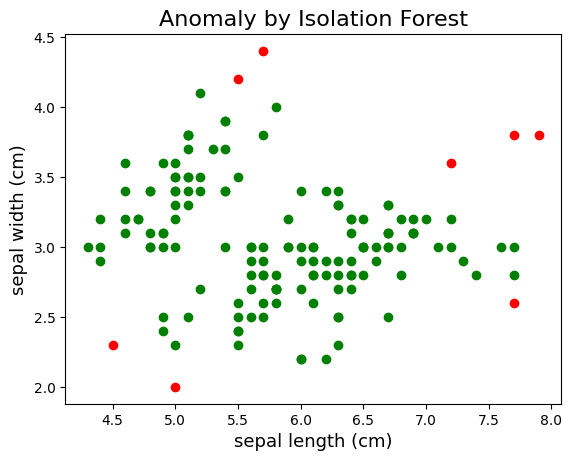

In [21]:
# Identificamos los puntos con el outlier score mayor, en este caso nos quedamos con el percentil 5.
outliers = np.argwhere(scores < np.percentile(scores, 5))

# Ploteamos
colors=['green','red']

for i in range(len(X)):
    if i not in outliers:
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # No anómalo
    else:
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # Anómalo
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomaly by Isolation Forest',fontsize=16)
plt.show()